**Assignment 1: Natural Language Processing**

Movie Review Sentiment Analysis

The goal of this assignment is to implement and compare three text classification algorithms—
Naive Bayes, Logistic Regression, and Multilayer Perceptron (MLP)—on the NLTK Movie Reviews
dataset. You will explore the impact of using both raw Term Frequency (TF) and Term Frequency-
Inverse Document Frequency (TF-IDF) as feature representations.

**1. Data Preparation**
- Load the NLTK Movie Reviews Dataset

In [4]:
import nltk
# Download the IMDb movie reviews dataset
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

**Access the Dataset**
- Once downloaded, we acess the data using the following code

In [5]:
from nltk.corpus import movie_reviews
# Access the movie reviews and labels
documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]
# Shuffle the documents to ensure a balanced distribution of positive and negative reviews
import random
random.shuffle(documents)

**Explore the Dataset**
- Take a look at the structure of the dataset and sample reviews to understand its characteristics


In [6]:
# Print the first review and its label
print("Sample Review:", documents[0][0][:10]) # Displaying first 10 words
print("Label:", documents[0][1])

Sample Review: ['talk', 'about', 'a', 'movie', 'that', 'seemed', 'dated', 'before', 'it', 'even']
Label: neg


Preprocess the dataset by tokenization (use nltk punkt tokenizer), stemming/lemmatization, and remove stopwords.

- I will use lemmatization here

In [8]:
import nltk
import random
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load and preprocess the data
documents = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        raw_words = movie_reviews.raw(fileid)
        tokens = word_tokenize(raw_words)  # Tokenize using Punkt tokenizer
        tokens = [word.lower() for word in tokens if word.isalpha()]  # Lowercase and remove punctuation
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
        documents.append((tokens, category))

# Shuffle the documents
random.shuffle(documents)

# Display a sample
print("Sample Review:", documents[0][0][:10])
print("Label:", documents[0][1])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Sample Review: ['bob', 'happy', 'bastard', 'quickie', 'review', 'rush', 'hour', 'problem', 'hour', 'clone']
Label: pos


**2. Coverage Analysis Insights**

- Conduct a coverage analysis to identify the percentage of unique words covered by the
preprocessing steps.

- Visualize the coverage analysis with the y-axis representing coverage percentage and the x-
axis representing the id of tokens (words) ordered by frequency of occurrence. Use a line plot
for clarity.

- Discuss the insights gained from the coverage analysis. Consider questions such as:

 - How does the coverage change with the number of tokens considered?

 - At what point does the coverage seem to stabilize?

 - Are there diminishing returns in terms of coverage as the number of tokens increases?

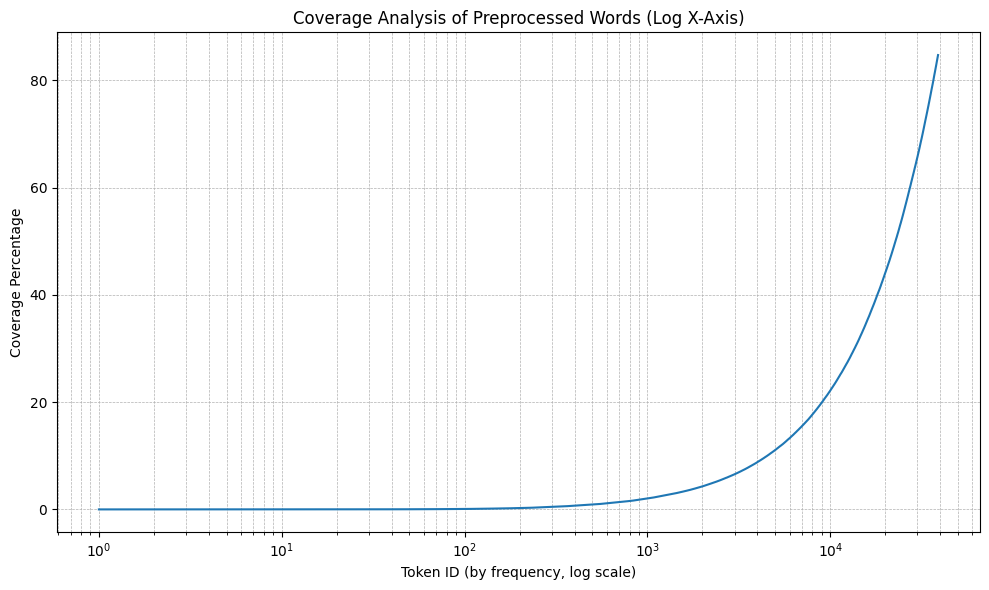

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Collect all raw words before preprocessing
all_words_raw = []
for fileid in movie_reviews.fileids():
    words = movie_reviews.words(fileid)
    all_words_raw.extend([word.lower() for word in words if word.isalpha()])

# Step 2: Extract all unique processed words from your existing documents
processed_words = [word for doc, _ in documents for word in doc]

# Step 3: Build vocabulary sets and word frequency
unique_raw_words = set(all_words_raw)
unique_processed_words = set(processed_words)
raw_word_freq = Counter(all_words_raw)
most_common_words = [word for word, _ in raw_word_freq.most_common()]

# Step 4: Compute coverage
coverage = []
covered_words = set()
for i, word in enumerate(most_common_words, 1):
    if word in unique_processed_words:
        covered_words.add(word)
    coverage.append(len(covered_words) / len(unique_raw_words) * 100)

#Step 5: Plot the coverage with log-scaled x-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(coverage) + 1), coverage)
plt.xscale("log")
plt.xlabel("Token ID (by frequency, log scale)")
plt.ylabel("Coverage Percentage")
plt.title("Coverage Analysis of Preprocessed Words (Log X-Axis)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Discussion**

How does the coverage change with the number of tokens considered?

The coverage starts out very flat. This is telling us that the most frequent words are not contributing a lot to the overall coverage of unique raw words. I think this is due to our stop words being removed during preprocessing. Our coverage starts to increase rapidly after several thousand tokens, where out less-dominant and content carrying words start to take over.

At what point does the coverage seem to stabilize?

In this plot, our coverage is flattened at around token 10,000.  

Are there diminishing returns in terms of coverage as the number of tokens increases?

There are diminishing returns, our stabilization is a good indicator of this. The log-scaled plot reveals a long tail distribution. At first, our gains in coverage are very low because we removed stop words, and then we hit a sharp increase as our mid-frequency words are added. This confirms our Zipfian's law where a small number of middle of the pack words will cary most of the load.

**Rationalization for Vocablary Choice**

- Discuss the rationale for choosing a specific vocabulary size for modeling. Consider factors
such as:

 - The trade-off between a larger vocabulary (more words) and computational efficiency.

 - The impact of rare or very common words on the model's generalization.

 - The need to balance informativeness and model complexity.

 - Any specific considerations for the chosen algorithms (Naive Bayes, Logistic Regression,
MLP) in terms of vocabulary size

Selecting the proper vocabulary size is important to have an efficient and working NLP model. Selecting a large number of vocabulary allows our model to capture more nuance and more rare words which may be helpful if we are working with a specialized topic. However, using a large vocabulary will lead to high memory usave and slower training. Depending on available computational power and your dataset, you have to make a choice and tradeoff. I will try use a cutoff rate that covers around 90%-95% of vocab.

As stated above, rare words may be important and helpful if working in a specialized area. There is a possibility that some very rare words are noise, such as typos. There is also some risk of overfitting with rare words. As for our very common words, there should be little impact because they are often stop words which we will have removed. We can filter our very high frequency and very low frequency words to reduce noise and possible overfitting.

Balancing our informativeness and complexity is also something to consider. Having low vocab will simplify our features, and also be very generalized. However, using very low vocab may lose some important data needed for classification. Our goal is to capture the mid-frequency zone as shown in the plot above.

Finally, taking algorithms into consideration. Naive Bayes performs well with large vocabularies due to its independence assumption. Logistic Regression is very sensitive when it comes to dimensions. And MLP or a neural net with high dimensional inputs will increase the weight matrix size. We need to limit the size of our vocab to balance the model's complexity along with its training time.


**3. Algorithm Implementation**

a. Naive Bayes:
- Implement a Multinomial Naive Bayes classifier.
- Train and test the model using both TF and TF-IDF as feature representations.

b. Logistic Regression:
- Implement a Logistic Regression classifier.
- Train and test the model using both TF and TF-IDF.

c. Multilayer Perceptron (MLP):
- Implement an MLP-based classifier.
- Explore different architectures (number of layers, neurons per layer).
- Train and test the model using both TF and TF-IDF

In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# 1) Prepare texts and labels
texts = [" ".join(doc) for doc, _ in documents]
labels = np.array([1 if cat == 'pos' else 0 for _, cat in documents])

# 2) Train/test split
X_train_txt, X_test_txt, y_train, y_test = train_test_split(
    texts, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# 3) Define feature extractors
vectorizers = {
    'TF':     CountVectorizer(max_features=15000),
    'TF-IDF': TfidfVectorizer(max_features=15000),
}

# 4) Define classifiers
classifiers = {
    'NB':    MultinomialNB(),
    'LR':    LogisticRegression(max_iter=1000),
    # MLP architectures
    'MLP_100':    MLPClassifier(hidden_layer_sizes=(100,),   max_iter=20, random_state=1),
    'MLP_100_50': MLPClassifier(hidden_layer_sizes=(100,50), max_iter=20, random_state=1),
}

# 5) Train all models and collect predictions
trained_models = {}
predictions    = {}

for feat_name, vect in vectorizers.items():
    # fit/transform train, transform test
    X_train = vect.fit_transform(X_train_txt)
    X_test  = vect.transform(X_test_txt)

    for clf_name, clf in classifiers.items():
        # clone a fresh instance if needed
        model = clf
        model.fit(X_train, y_train)

        # store
        trained_models[(feat_name, clf_name)] = model
        predictions[(feat_name, clf_name)]    = model.predict(X_test)

# 'trained_models' now holds each fitted classifier;
# 'predictions' holds the corresponding y_pred arrays.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


**4. Training and Evaluation**

a. Train each algorithm on the training set.

b. Evaluate the performance of each algorithm on the testing set using accuracy, TPR, FPR as the
primary metrics.

c. Compare the impact of using TF and TF-IDF on each algorithm's performance.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 4a–b) TRAINING is already done in `trained_models`; now evaluate on the test set:

# Prepare a dict to hold metrics
results = {}

for (feat_name, clf_name), model in trained_models.items():
    # Retrieve predictions you stored earlier
    y_pred = predictions[(feat_name, clf_name)]

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Confusion matrix: [[TN, FP],
    #                    [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # True Positive Rate (Recall for the positive class)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    # False Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0

    # Store
    results[(feat_name, clf_name)] = {
        'accuracy': acc,
        'TPR': tpr,
        'FPR': fpr
    }

# 4c) Compare TF vs TF-IDF easily by printing a table:
print(f"{'Representation-Model':<25} {'Accuracy':<10} {'TPR':<10} {'FPR':<10}")
print("-" * 60)
for (feat, clf), stats in results.items():
    name = f"{feat}-{clf}"
    print(f"{name:<25} {stats['accuracy']:<10.3f} {stats['TPR']:<10.3f} {stats['FPR']:<10.3f}")

Representation-Model      Accuracy   TPR        FPR       
------------------------------------------------------------
TF-NB                     0.830      0.805      0.145     
TF-LR                     0.828      0.820      0.165     
TF-MLP_100                0.863      0.845      0.120     
TF-MLP_100_50             0.870      0.850      0.110     
TF-IDF-NB                 0.830      0.800      0.140     
TF-IDF-LR                 0.835      0.855      0.185     
TF-IDF-MLP_100            0.858      0.855      0.140     
TF-IDF-MLP_100_50         0.860      0.870      0.150     


**TF and TF-IDF Observations**

Naive Bayes
- Both TF and TF-IDF gives us the same accuracy of 0.830
- Naive Bayes' multinomial assumption works best with raw counts, so TF-IDF gives no real gain because...
- We have an ok true positive rate and false positive rate

Logistic Regression
- TF-IDF Gives us a slight boost going to 0.835 from 0.828
- Overall, even with this accuracy boost, due to our model being more conservative about rare words, we get a higher false positive rate

MLP (Neural Net)
- Provides the highest overall accuracies, with TF,two-layer giving us a 0.870.
- TF slightly outperforms TF-IDF with 0.870 vs 0.860
- Our deeper net gives a small bump in accuracy and true positive rate, and a lower false positive rate under TF

**TF and TF-IDF Impacts on Performance**

TF
- Keeps a raw count of common but potentially uninformative tokens.
- Works well with Naive Bayes and MLPs that are able to ignore noise

TF-IDF
- Dampens the effect of very high frequency tokens more than our stop word removal
- Overall, helps the performance of linear and shallow models, like our logistic regression or smaller neural nets.

**5. Visualization and Analysis**

a. Visualize the performance metrics (e.g., accuracy) for each algorithm using appropriate plots
(e.g., bar chart).

b. Discuss any observed trends or differences in performance.

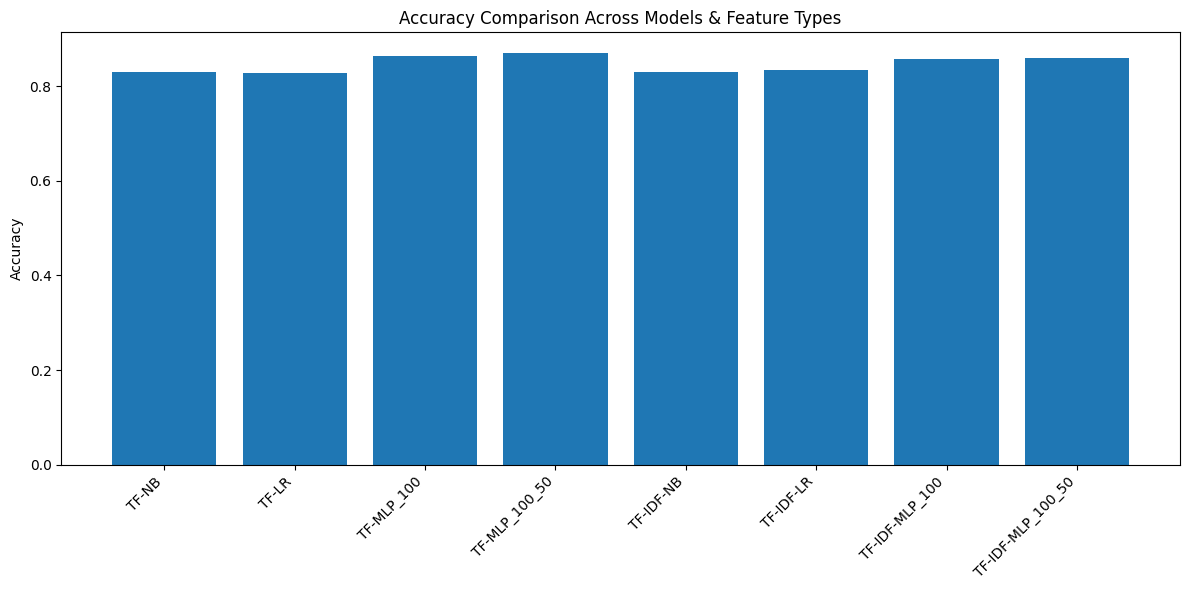

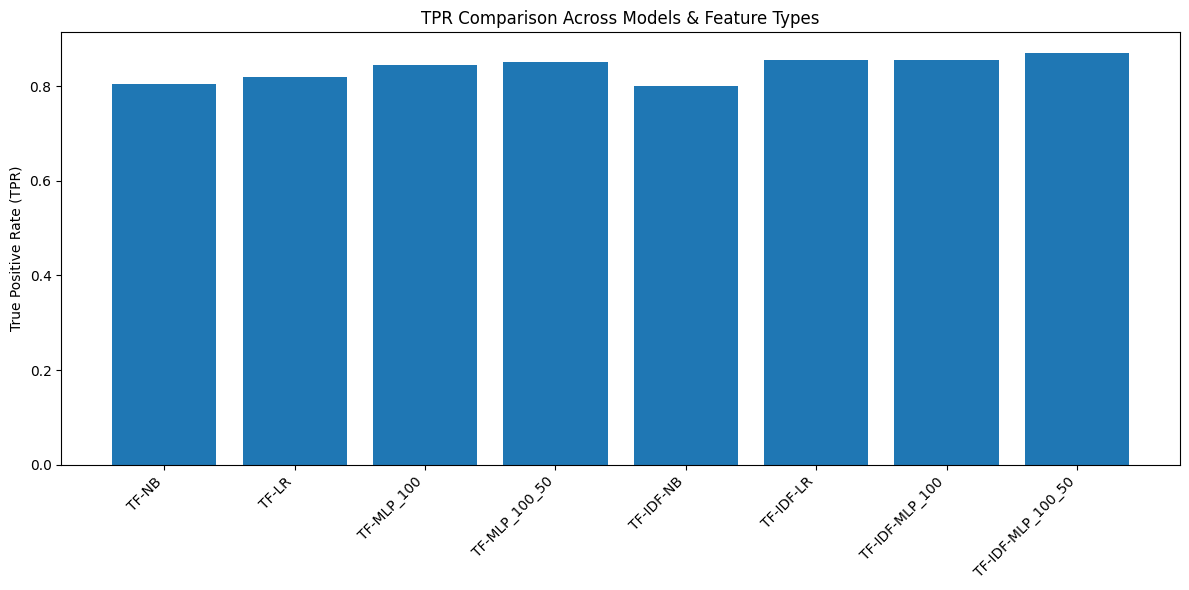

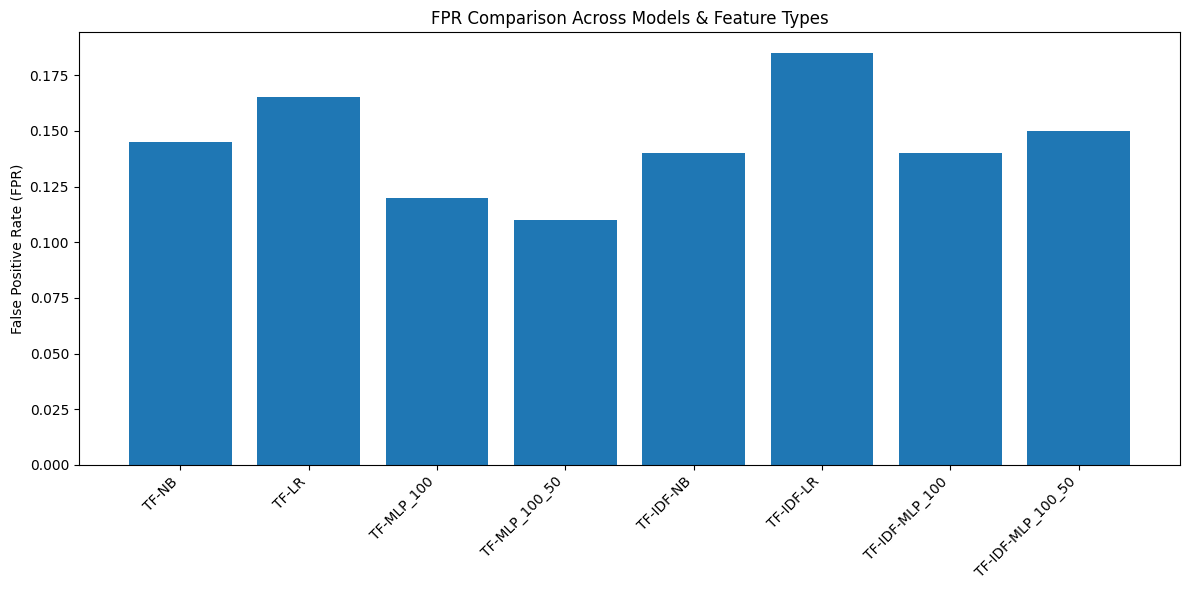

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# ─── 1) Compute metrics ────────────────────────────────────────────────────────
metrics = {}
for (feat, clf), model in trained_models.items():
    y_pred = predictions[(feat, clf)]
    acc = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    metrics[f"{feat}-{clf}"] = {"accuracy": acc, "TPR": tpr, "FPR": fpr}

# ─── 2) Prepare data for plotting ─────────────────────────────────────────────
labels     = list(metrics.keys())
accuracies = [metrics[label]["accuracy"] for label in labels]
tprs       = [metrics[label]["TPR"]      for label in labels]
fprs       = [metrics[label]["FPR"]      for label in labels]
x          = np.arange(len(labels))

# ─── 3) Plot Accuracy ────────────────────────────────────────────────────────
plt.figure(figsize=(12, 6))
plt.bar(x, accuracies)
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Models & Feature Types")
plt.tight_layout()
plt.show()

# ─── 4) Plot True Positive Rate (TPR) ────────────────────────────────────────
plt.figure(figsize=(12, 6))
plt.bar(x, tprs)
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("True Positive Rate (TPR)")
plt.title("TPR Comparison Across Models & Feature Types")
plt.tight_layout()
plt.show()

# ─── 5) Plot False Positive Rate (FPR) ───────────────────────────────────────
plt.figure(figsize=(12, 6))
plt.bar(x, fprs)
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("False Positive Rate (FPR)")
plt.title("FPR Comparison Across Models & Feature Types")
plt.tight_layout()
plt.show()

**Discussion**

a. Compare and analyze the results obtained by the three algorithms.

b. Discuss the impact of using TF vs. TF-IDF on classification performance.

c. Provide insights into the strengths and limitations of each algorithm in the context of
sentiment analysis